<a href="https://colab.research.google.com/github/s-prakriti/Deep-Learning-Experiments-/blob/main/Experiment6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:

from google.colab import files
uploaded = files.upload()

import pandas as pd
import numpy as np


data = pd.read_csv("weather.csv")

print(data.head())


Saving weather.csv to weather (2).csv
         Date  Temperature_C  Humidity_%  WindSpeed_kmph  Rainfall_mm
0  2024-01-01             18          65              10          0.0
1  2024-01-02             20          60              12          2.5
2  2024-01-03             19          70               8          0.0
3  2024-01-04             21          55              15          1.2
4  2024-01-05             22          58              11          0.0


In [11]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

data = pd.read_csv("austin_final.csv")

print("Columns:", list(data.columns))

target_col = "Rainfall_mm"

X = data.drop([target_col, "Date"], axis=1)
Y = data[target_col].values.reshape(-1, 1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model = LinearRegression()
model.fit(X_scaled, Y)

inp = pd.DataFrame([{
    "Temperature_C": 20,
    "Humidity_%": 60,
    "WindSpeed_kmph": 12
}])

inp_scaled = scaler.transform(inp)
prediction = model.predict(inp_scaled)

print("Predicted Rainfall (mm):", prediction[0][0])


Columns: ['Date', 'Temperature_C', 'Humidity_%', 'WindSpeed_kmph', 'Rainfall_mm']
Predicted Rainfall (mm): 0.9544502617801047


The precipitation in mm for the input is: 0.9544502617801047
The precipitation trend graph:


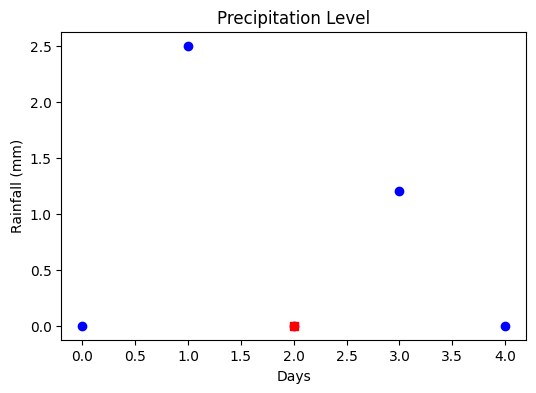

Precipitation vs selected attributes graph:


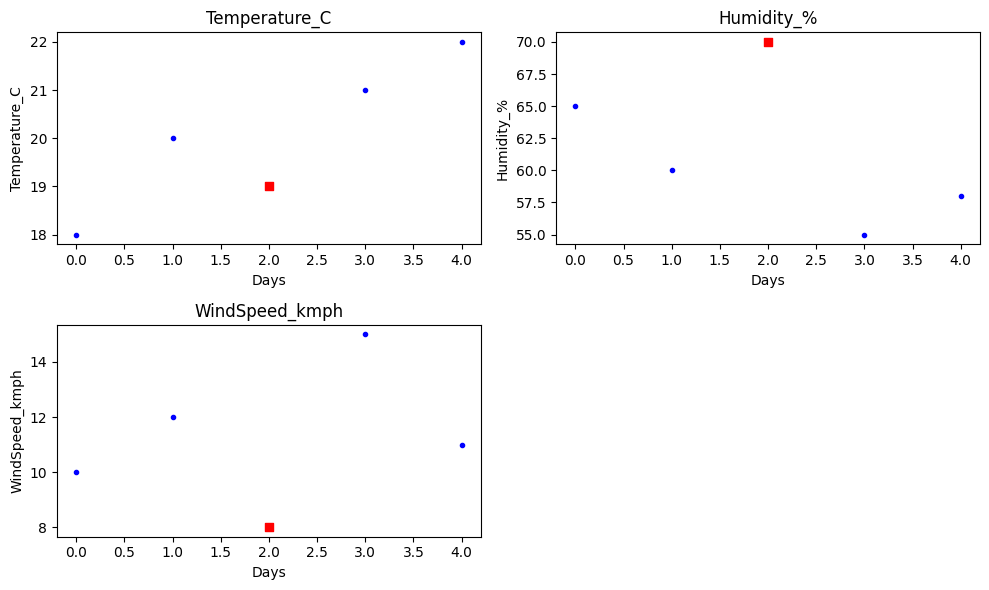

In [12]:

print("The precipitation in mm for the input is:", model.predict(inp_scaled)[0][0])

print("The precipitation trend graph:")


days = list(range(len(Y)))
day_index = 2
plt.figure(figsize=(6, 4))
plt.scatter(days, Y, color='b')
plt.scatter(days[day_index], Y[day_index], color='r', marker='s')
plt.title("Precipitation Level")
plt.xlabel("Days")
plt.ylabel("Rainfall (mm)")
plt.show()

x_vis = X

print("Precipitation vs selected attributes graph:")

plt.figure(figsize=(10, 6))
for i, col in enumerate(x_vis.columns):
    plt.subplot(2, 2, i + 1)
    plt.scatter(days, x_vis[col], color='b', marker='.')
    plt.scatter(days[day_index], x_vis[col].iloc[day_index], color='r', marker='s')
    plt.title(col)
    plt.xlabel("Days")
    plt.ylabel(col)

plt.tight_layout()
plt.show()
